In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [6]:
X,y=data

In [7]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [8]:
np.random.seed(seed=101)

z_noise = np.random.normal(size=len(X))

z_noise = pd.Series(z_noise)

In [9]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [10]:
feat = pd.DataFrame(X)

In [12]:
feat = pd.concat([feat,z_noise],axis=1)

In [15]:
feat.columns = ['X1','X2','X3']

In [16]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


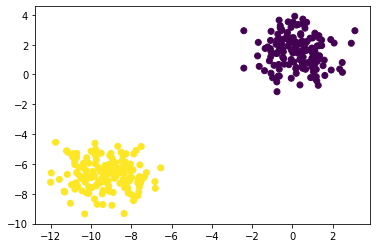

In [19]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


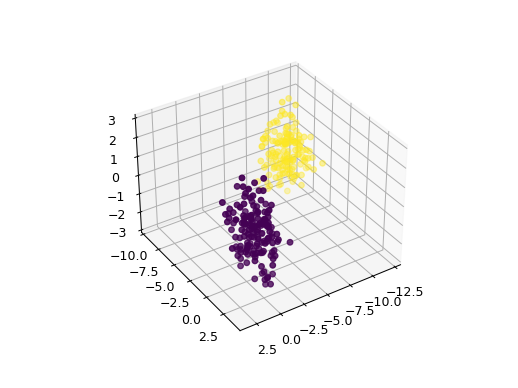

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [25]:
# 3 ---> 2 ---->3

In [27]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [28]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [29]:
autoencoder = Sequential([encoder,decoder])

In [30]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

C:\Users\Aditya Singh\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [33]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350


In [34]:
encoded_2dim = encoder.predict(scaled_data)

In [35]:
encoded_2dim.shape

(300, 2)

In [36]:
scaled_data.shape

(300, 3)

<IPython.core.display.Javascript object>


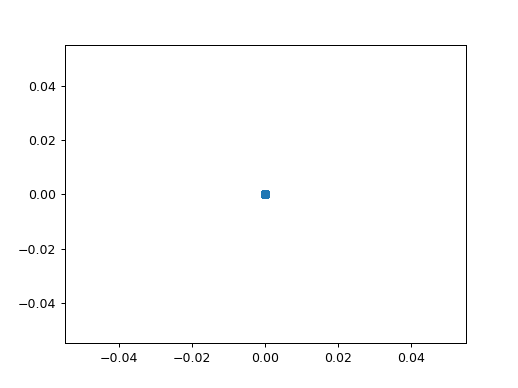

In [37]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1])